In [120]:
import pandas as pd
df=pd.read_excel('Online_Sales1.xlsx') 

#imported the library and the date

In [121]:
df.shape #checked the shape of the data 

(52924, 9)

In [122]:
df.info()  #checked the data types and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.6+ MB


In [123]:
df.head(10) #first 10 rows to see the data and its values

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Coupon_Status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,Used
5,17850,16682,2019-01-01,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,Used
6,17850,16682,2019-01-01,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,Not Used
7,17850,16682,2019-01-01,GGOEGDHG014499,Google Infuser-Top Water Bottle,Drinkware,15,10.31,Clicked
8,17850,16682,2019-01-01,GGOEGDWC020199,Engraved Ceramic Google Mug,Drinkware,5,9.27,Used
9,13047,16682,2019-01-01,GGOEGGOA017399,Maze Pen,Office,52,0.98,Used


In [124]:
df['CustomerID'].nunique() #since we are working with customer lets see how many of them we got


1468

In [125]:
df.rename(columns={'Transaction_ID':'InvoiceNo','Transaction_Date':'InvoiceDate','Avg_Price':'UnitPrice'},inplace=True) 
#changed column names 

In [126]:
df=df[['InvoiceNo','Quantity','UnitPrice','CustomerID','InvoiceDate']] #retrieved the neccessary columns
df['Amount']=df['Quantity']*df['UnitPrice'] # new amount column to find the revenue

In [127]:
from datetime import datetime
df['Recency']=(pd.Timestamp.today() - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days
df['Frequency']=df.groupby('CustomerID').transform('count')['InvoiceNo']
df['Monetary']=df.groupby('CustomerID').transform('sum')['Amount']
df1=df
df1
#found neccessary recency , frequency and the monetary columns

C:\Users\hp\AppData\Local\Temp\ipykernel_2564\1338093569.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['Monetary']=df.groupby('CustomerID').transform('sum')['Amount']


,InvoiceNo,Quantity,UnitPrice,CustomerID,InvoiceDate,Amount,Recency,Frequency,Monetary
0,16679,1,153.71,17850,2019-01-01,153.71,1920,297,34551.40
1,16680,1,153.71,17850,2019-01-01,153.71,1920,297,34551.40
2,16681,1,2.05,17850,2019-01-01,2.05,1920,297,34551.40
3,16682,5,17.53,17850,2019-01-01,87.65,1920,297,34551.40
4,16682,1,16.50,17850,2019-01-01,16.50,1920,297,34551.40
...,...,...,...,...,...,...,...,...,...
52919,48493,1,121.30,14410,2019-12-31,121.30,1581,8,1108.99
52920,48494,1,48.92,14410,2019-12-31,48.92,1581,8,1108.99
52921,48495,1,151.88,14410,2019-12-31,151.88,1581,8,1108.99
52922,48496,5,80.52,14600,2019-12-31,402.60,1581,2,724.68


In [128]:
df1=df1[['CustomerID','Recency','Frequency','Monetary']]
df1.drop_duplicates(subset='CustomerID',inplace=True)
#kept only the columns we are gonna use

C:\Users\hp\AppData\Local\Temp\ipykernel_2564\1649983645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(subset='CustomerID',inplace=True)


In [129]:
def rscoring(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4 
def fnmscoring(x,p,d):
    if x<= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
quantiles=df1.quantile(q=[0.25,0.5,0.75])

#built function to find the score

In [130]:
df1['frequencyscore']=df1['Frequency'].apply(fnmscoring,args=('Frequency',quantiles,))
df1['mmonetaryscore']=df1['Monetary'].apply(fnmscoring,args=('Monetary',quantiles,))
df1['recencyscore']=df1['Recency'].apply(rscoring,args=('Recency',quantiles,))
#got the RFM score

C:\Users\hp\AppData\Local\Temp\ipykernel_2564\2376219290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['frequencyscore']=df1['Frequency'].apply(fnmscoring,args=('Frequency',quantiles,))
C:\Users\hp\AppData\Local\Temp\ipykernel_2564\2376219290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mmonetaryscore']=df1['Monetary'].apply(fnmscoring,args=('Monetary',quantiles,))
C:\Users\hp\AppData\Local\Temp\ipykernel_2564\2376219290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [131]:
def categorize(row):
    if row['frequencyscore'] == 1 and row['mmonetaryscore'] == 1 and row['recencyscore'] == 1:
        return 'best'
    elif row['frequencyscore'] == 4 and row['mmonetaryscore'] in [1, 2] and row['recencyscore'] == 1:
        return 'high spending'
    elif row['frequencyscore'] == 1 and row['mmonetaryscore'] in [3, 4] and row['recencyscore'] == 1:
        return 'lowest spending'
    elif row['frequencyscore'] in [1, 2] and row['mmonetaryscore'] in [1, 2] and row['recencyscore'] == 4:
        return 'churned best'
    else:
        return 'Other'

# Apply the custom function
df1['Category'] = df1.apply(categorize, axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_2564\206824992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category'] = df1.apply(categorize, axis=1)


In [132]:
df1.sort_values(by='Category',ascending=False) #got the final table

,CustomerID,Recency,Frequency,Monetary,frequencyscore,mmonetaryscore,recencyscore,Category
50371,16378,1600,10,1766.29,4,2,1,high spending
18988,13324,1615,10,2008.38,4,2,1,high spending
0,17850,1920,297,34551.40,1,1,4,churned best
5178,13838,1904,52,6430.07,1,1,4,churned best
16582,14577,1822,38,2458.22,2,2,4,churned best
...,...,...,...,...,...,...,...,...
13858,15271,1739,40,3618.31,2,2,3,Other
13852,17702,1839,5,552.65,4,4,4,Other
13838,14205,1839,14,1480.57,3,3,4,Other
13773,15856,1750,54,4231.45,1,1,3,Other


In [133]:
df1.reset_index(drop=True,inplace=True)
df2=df1['Category'].reset_index().groupby('Category').count().reset_index() #found the count for each category
df2

,Category,index
0,Other,1233
1,best,120
2,churned best,113
3,high spending,2


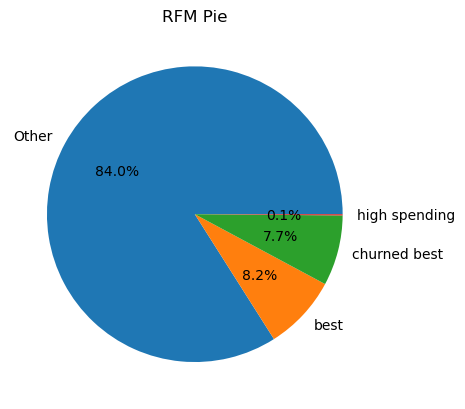

In [134]:
import matplotlib.pyplot as plt #used pie chart to visualize it
plt.pie(df2['index'],labels=df2['Category'],autopct='%1.1f%%')
plt.title('RFM Pie')
plt.show()
